In [1]:
import cv2
import numpy as np

img = cv2.imread('11.png')

kernel = np.ones((5,5),np.float32)/25
dst = cv2.filter2D(img,-1,kernel)

cv2.imwrite('img_final2.jpeg', dst)


ModuleNotFoundError: No module named 'cv2'

In [7]:
import sys
import cv2
import numpy as np
import os
 
 
def load_img_big(f):
    img1 = cv2.imread(f,cv2.IMREAD_GRAYSCALE) # queryImage
 
    # поворачиваем и масштабируем основную картинку
    dsize = ( int(img1.shape[1] * 0.4), int(img1.shape[0] * 0.4) )
    img1 = cv2.resize(src=img1,dsize=dsize, interpolation = cv2.INTER_CUBIC)
    rows,cols = img1.shape
    M = cv2.getRotationMatrix2D((cols/2,rows/2),14,1)
    img1 = cv2.warpAffine(img1,M,(cols,rows))
 
    return  img1
 
 
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
def main():
 
    MIN_MATCH_COUNT = 10 # порог минимального количества совпадений ключевых точек
    DIST_COEFF = 0.65
 
    f = "11.png"
    bu = "1.jpg"
 
    print("[i] считываем картинку")
    img_big = load_img_big(f)
 
    sift = cv2.xfeatures2d.SIFT_create() # Initiate SIFT detector
 
#     FLANN_INDEX_KDTREE = 0
#     index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
#     search_params = dict(checks = 50)
#     matcher = cv2.FlannBasedMatcher(index_params, search_params)
 
    matcher = cv2.BFMatcher() # BFMatcher with default params
 
 
    # find the keypoints and descriptors with SIFT
    kp_big, des_big = sift.detectAndCompute(img_big,None)
 
    templ = [ os.path.join(bu, b) for b in os.listdir(bu) if os.path.isfile(os.path.join(bu, b)) ]
 
    for t in templ:
        print(t)
        img_tpl = cv2.imread(t,cv2.IMREAD_GRAYSCALE)  
 
        print("[i] ищем особые точки")
        kp_tpl, des_tpl = sift.detectAndCompute(img_tpl,None)
 
        print("[i] сопоставляем особые точки")
        matches = matcher.knnMatch(des_tpl,des_big,k=2)
 
        good = []
        for m,n in matches:
            if m.distance < n.distance * DIST_COEFF:
                good.append(m)
 
        if len(good)<MIN_MATCH_COUNT:
            print( "[w] количество совпадений недостаточно - %d/%d" % (len(good),MIN_MATCH_COUNT) )
        else:    
            print( "[i] найдено %d совпадений" % len(good) )
 
            src_pts = np.float32([ kp_tpl[m.queryIdx].pt for m in good ]).reshape(-1,1,2)
            dst_pts = np.float32([ kp_big[m.trainIdx].pt for m in good ]).reshape(-1,1,2)
            M, mask = cv2.findHomography( src_pts, dst_pts, cv2.RANSAC , 5.0 ) # матрица преобразования координат точек
 
            # координаты точек рамки шаблона
            h,w = img_tpl.shape # размеры шаблона
            pts = np.asarray( [ [0,0],[0,h-1],[w-1,h-1],[w-1,0] ], dtype=np.float32).reshape(-1,1,2)
 
            # выполняем преобразования координат точек рамки шаблона
            dst = cv2.perspectiveTransform( pts, M )
 
            dst = [np.int32(np.abs(dst))] # обрезаем рамку вылезшую за пределы картинки
 
            # рисуем рамку вокруг найденного объекта
            img_res =  cv2.cvtColor(img_big, cv2.COLOR_GRAY2BGR)
            img_res = cv2.polylines( img_res, dst, True, (0,255,255), 2, cv2.LINE_AA )
 
            # рисуем совпадения контрольных точек
            matchesMask = mask.ravel().tolist()
            draw_params = dict(matchColor = (0,255,0), # draw matches in green color
                               singlePointColor = None,
                               matchesMask = matchesMask, # draw only inliers
                               flags = 2)
            img_res = cv2.drawMatches( img_tpl, kp_tpl, img_res, kp_big, good, None, **draw_params )
 
            # записываем результат
            tn = os.path.splitext(os.path.basename(t))[0]
            cv2.imwrite("result/res-%s.jpg"%tn, img_res)

print("OpenCV ",cv2.__version__)
sys.exit(main())

OpenCV  4.2.0
[i] считываем картинку


error: OpenCV(4.2.0) C:\projects\opencv-python\opencv_contrib\modules\xfeatures2d\src\sift.cpp:1210: error: (-213:The function/feature is not implemented) This algorithm is patented and is excluded in this configuration; Set OPENCV_ENABLE_NONFREE CMake option and rebuild the library in function 'cv::xfeatures2d::SIFT::create'


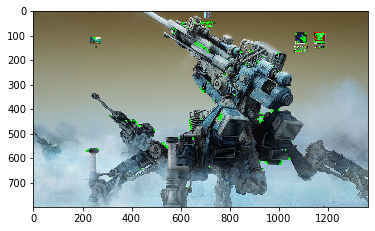

True

In [21]:
import cv2
import numpy as np
from matplotlib import pyplot as plt


img_object = cv2.imread("11.png")

orb = cv2.ORB_create()
kp = orb.detect(img_object, None)
kp, des = orb.compute(img_object , kp)
img2 = cv2.drawKeypoints(img_object, kp, None, color=(0,255,0), flags=0)
plt.imshow(img2)
plt.show()
cv2.imwrite("100.png", img2)
#orb.detect(img_object )
